In [2]:
!pip install datatable

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

# CREATE THE DATA_DIR PATH
from pathlib import Path
DATA_DIR = Path('./data/')

# Importing Data

In [37]:
from modules.pipeline import load_data

In [25]:
train = load_data(DATA_DIR, 'train.csv')
feature_vs_tag = load_data(DATA_DIR, 'features.csv')
test = load_data(DATA_DIR, 'example_test.csv')

# Explore the Data

## Basic information and problems

### sample of data and columns names

**train dataset**

In [11]:
print('sample of 3 observations of the train set')
display(train.sample(3))
print('Columns name of the train dataset')
display(train.columns)
print('Shape of the train dataset', train.shape)


sample of 3 observations of the train set


,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
1515285,324,3.738945,0.001993,0.002333,0.008669,0.010678,0.006030,-1,-0.632148,-0.362889,...,-0.946788,-1.921460,-0.796614,-1.491212,-1.043925,-2.431543,-0.553223,-2.019045,-0.266276,1515285
1884053,401,4.815687,0.000590,-0.000597,-0.006860,-0.012691,-0.007636,1,1.047879,1.963572,...,-0.936994,-0.048572,-0.486005,0.010052,-0.501913,0.194943,-0.133173,0.303532,0.040342,1884053
1080936,228,6.008006,-0.010105,0.006513,0.019163,0.026260,0.020780,-1,-2.617726,-2.547371,...,-0.891339,-1.544029,-0.235259,-1.432343,-1.469075,-2.282118,-0.764541,-1.802669,-0.293128,1080936


Columns name of the train dataset


Index(['date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp',
       'feature_0', 'feature_1', 'feature_2',
       ...
       'feature_121', 'feature_122', 'feature_123', 'feature_124',
       'feature_125', 'feature_126', 'feature_127', 'feature_128',
       'feature_129', 'ts_id'],
      dtype='object', length=138)

Shape of the train dataset (2390491, 138)


**features_vs_tag dataset**

In [12]:

print('sample of 3 observations of the feature tag')
display(feature_vs_tag.sample(3))
print('Columns name of the feature_vs_tag dataset')
display(feature_vs_tag.columns)
print('Shape of the feature_vs_tag dataset', train.shape)



sample of 3 observations of the feature tag


,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
25,feature_25,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
15,feature_15,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
73,feature_73,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


Columns name of the feature_vs_tag dataset


Index(['feature', 'tag_0', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5',
       'tag_6', 'tag_7', 'tag_8', 'tag_9', 'tag_10', 'tag_11', 'tag_12',
       'tag_13', 'tag_14', 'tag_15', 'tag_16', 'tag_17', 'tag_18', 'tag_19',
       'tag_20', 'tag_21', 'tag_22', 'tag_23', 'tag_24', 'tag_25', 'tag_26',
       'tag_27', 'tag_28'],
      dtype='object')

Shape of the feature_vs_tag dataset (2390491, 138)


**test dataset**

In [13]:
print('sample of 3 observations of the test set')
display(test.sample(3))
print('Columns name of the test dataset')
display(test.columns)
print('shape of the test dataset', test.shape)



sample of 3 observations of the test set


,weight,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,date,ts_id
5658,0.000000,1,0.385621,-0.500892,0.349241,0.161212,0.048273,0.012312,NaN,NaN,...,3.473318,5.230892,3.499120,7.302492,4.726521,6.025051,3.662761,4.782563,1,5658
9198,4.115350,1,0.014503,-1.601183,-4.608082,-2.179690,-3.131176,-1.413036,1.346095,0.415219,...,11.815152,0.865599,10.334140,0.738905,13.369035,0.742708,12.597569,0.737105,1,9198
629,0.480378,1,-1.314757,-1.827708,0.097922,0.032182,0.540700,0.347336,0.145658,-0.041510,...,0.701169,2.629026,0.428836,3.091142,0.458443,2.079912,0.590740,2.168740,0,629


Columns name of the test dataset


Index(['weight', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       ...
       'feature_122', 'feature_123', 'feature_124', 'feature_125',
       'feature_126', 'feature_127', 'feature_128', 'feature_129', 'date',
       'ts_id'],
      dtype='object', length=133)

shape of the test dataset (15219, 133)


**The target**

For this problem the target is the action of trading. 


What we have is the information of "when" the trade is "good" (> 0), but also "how good" ( columns : resp_{1, 2, 3, 4}).


It is unsurpervised problem and we have to predict the value of the target.

### Duplicates value

In [14]:
train = train.drop_duplicates().copy()
test = test.drop_duplicates().copy()
feature_vs_tag = feature_vs_tag.drop_duplicates().copy()

### Missing value

In [15]:
print('name of columns with missing values on train')
display(train.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False))
print('name of columns with missing values on test')
display(test.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False))
print('name of columns with missing values on feature_vs_tag')
display(feature_vs_tag.isnull().sum().loc[lambda x : x>0].sort_values(ascending=False))


name of columns with missing values on train


feature_27     395535
feature_18     395535
feature_17     395535
feature_28     395535
feature_7      393135
                ...  
feature_3         448
feature_122       223
feature_123       223
feature_59         48
feature_58          1
Length: 88, dtype: int64

name of columns with missing values on test


feature_28    2056
feature_17    2056
feature_27    2056
feature_18    2056
feature_7     2051
              ... 
feature_85       2
feature_10       2
feature_9        2
feature_91       2
feature_97       2
Length: 80, dtype: int64

name of columns with missing values on feature_vs_tag


Series([], dtype: int64)

*  The is no missing value on features_vs_tag datasets.
*  There are 88 and 80 missing values on train and test datasets:
    * 395535 is the maximum number of missing value on training datasets. it is 16%. So we will drop to get a first version of a clean dataset. Later on, we will handle those missing values.
    * the ratio of missing value on test dataset is 13%. We will also drop them to get a first version.

### Dropping missing values

In [16]:
train.dropna(inplace= True )
test.dropna(inplace = True)

## Data Inspection

First of all we will not go further in the exploration of features_vs_cat dataset, because we don't want to know the stock, time, tag.
Instead of that we are interest on the features, target values and relationships.

What is the relationship between the trade action and the trade_return

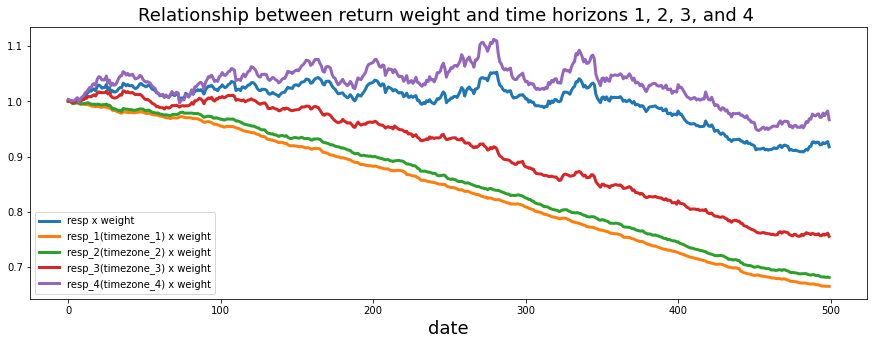

In [17]:
train['weight_resp']   = train['weight']*train['resp']
train['weight_resp_1'] = train['weight']*train['resp_1']
train['weight_resp_2'] = train['weight']*train['resp_2']
train['weight_resp_3'] = train['weight']*train['resp_3']
train['weight_resp_4'] = train['weight']*train['resp_4']

fig, ax = plt.subplots(figsize=(15, 5))
resp    = pd.Series(1+(train.groupby('date')['weight_resp'].mean())).cumprod()
resp_1  = pd.Series(1+(train.groupby('date')['weight_resp_1'].mean())).cumprod()
resp_2  = pd.Series(1+(train.groupby('date')['weight_resp_2'].mean())).cumprod()
resp_3  = pd.Series(1+(train.groupby('date')['weight_resp_3'].mean())).cumprod()
resp_4  = pd.Series(1+(train.groupby('date')['weight_resp_4'].mean())).cumprod()
ax.set_xlabel ("Day", fontsize=18)
ax.set_title ("Relationship between return weight and time horizons 1, 2, 3, and 4 ", fontsize=18)
resp.plot(lw=3, label='resp x weight')
resp_1.plot(lw=3, label='resp_1(timezone_1) x weight')
resp_2.plot(lw=3, label='resp_2(timezone_2) x weight')
resp_3.plot(lw=3, label='resp_3(timezone_3) x weight')
resp_4.plot(lw=3, label='resp_4(timezone_4) x weight')

plt.legend(loc="lower left");

We have to choose between high risky (timezone_4) and low risky (timezone_1). 

We decide for a first version to consider suggesting low risky even if the return is low.

Then, it helps us to change this value to our action (0: to pass to trade or 1: to make the trade)

### Create a target column using timezone_1

In [19]:
(train['weight_resp_1'] > 0).value_counts()

False    1147346
True      846026
Name: weight_resp_1, dtype: int64

We will consider the one with a value greater than 0 ass good trade (action = 1).

In [20]:
train['action'] = (train['weight_resp_1'] > 0).astype(int)

In [21]:
train['action'].value_counts()

0    1147346
1     846026
Name: action, dtype: int64

What is the relationship between the trade action and the date of the trade

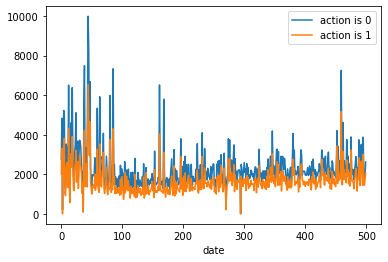

In [22]:
train[['date', 'action']][train['action']==0].groupby(['date']).size().plot(label='action is 0')
train[['date', 'action']][train['action']==1].groupby(['date']).size().plot(label='action is 1')
plt.legend()
plt.show()

We always have the number of action is 0 greater than the number of action is 1. 

It seems that there is a relationship

What is the relationship between the trade action and the anonymize feeatures

In [23]:
cols_features = train.columns.tolist()
trade_return_cols = ['weight','resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']
date = ['date']
trade_id = ['ts_id']
anonym_features_cols = ['feature_'+str(elt) for elt in range(129)]

In [25]:
correlation = train[anonym_features_cols+['action']].corr()

In [26]:
corr_series = correlation[anonym_features_cols].loc['action']

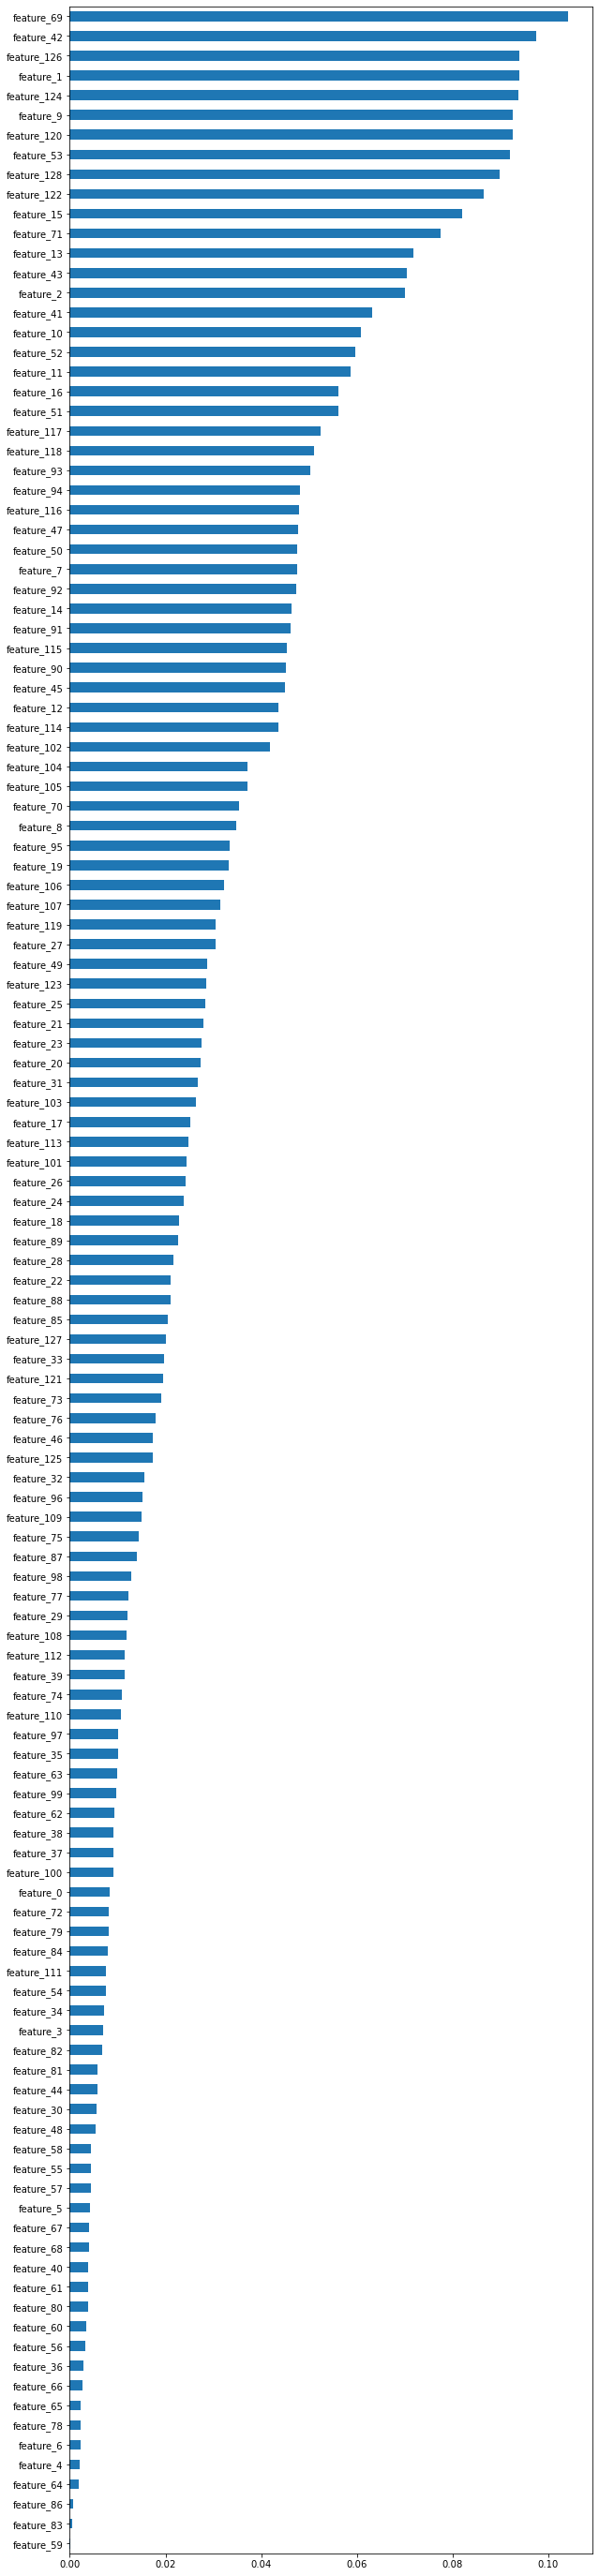

In [27]:
corr_series = corr_series.apply(np.abs).sort_values()
corr_series.plot.barh(figsize = (10, 50))
plt.show()

For a version we will only take features with a correlation above 0.05

In [28]:
features_cols = corr_series[corr_series > 0.05].index.tolist()

In [29]:
cols_first_version = date+features_cols+['action']

In [34]:
first_version_train = train[cols_first_version].to_csv(DATA_DIR/ 'first_version_train.csv', index=False)